## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

In [49]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sys
import numpy
import pandas

## 2. Import Libraries

In [50]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [51]:
# Load dataset
iris_url  = 'https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv'
dataset = pd.read_csv(iris_url )

## 3. Sumarize the Dataset

In [52]:
print("Este conjunto de datos contiene 150 instancias de flores iris y 5 atributos que describen cada flor")
# Print the shape of the data
# It has 150 instances and 5 attributes
print("La forma del conjunto de datos es:", dataset.shape)
print("Los nombres de las columnas son:", dataset.columns)



Este conjunto de datos contiene 150 instancias de flores iris y 5 atributos que describen cada flor
La forma del conjunto de datos es: (150, 6)
Los nombres de las columnas son: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [53]:
# Print the first 10 rows of the data
print("Las primeras 10 filas del conjunto de datos son:")
print(dataset.head(10))

Las primeras 10 filas del conjunto de datos son:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [54]:
# Print the last 10 rows of the data
print("Las últimas 10 filas del conjunto de datos son:")
print(dataset.tail(10))

Las últimas 10 filas del conjunto de datos son:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica  
147  

In [55]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


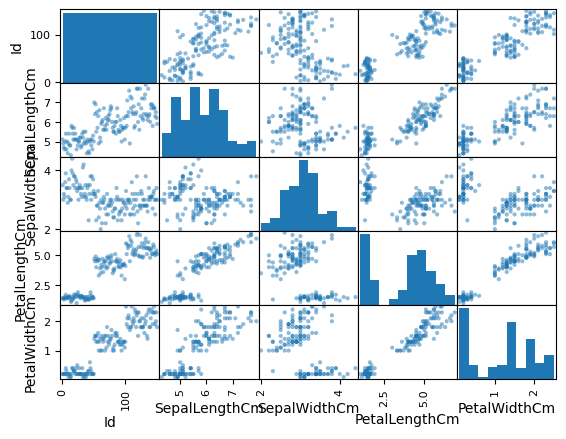

In [57]:
scatter_matrix(dataset)
plt.show()

## 4. Data cleansing

In [58]:
# First, create a dataset backup
dataset_bak = dataset.copy()

In [59]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head(10)) 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [60]:
# Change column names
dataset.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print(dataset.head(20))

    Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [61]:
# Class distribution, to see the number of rows that belong to each species
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
dataset.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5. Data Visualization

### 5.1. Univariate Plots

<Figure size 1000x500 with 0 Axes>

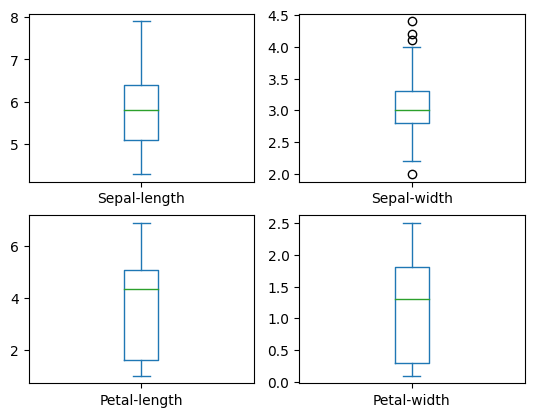

In [14]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

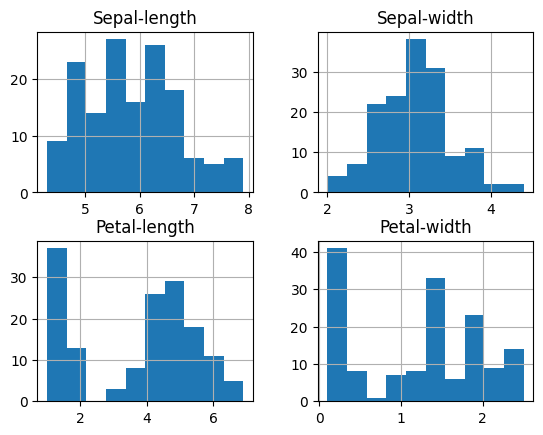

In [15]:
# Histograms. Create a histogram of each input variable to get an idea of the distribution
dataset.hist()
plt.show()

### 5.2. Multivariate Plots

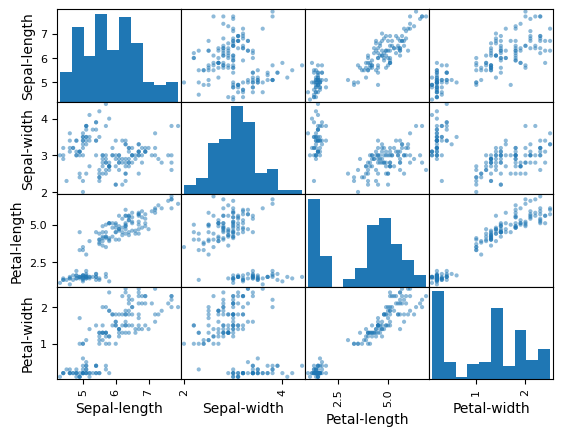

In [16]:
# Scatter plot matrix. See all pairs of attributtes, to detect correlations or relationships
scatter_matrix(dataset)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


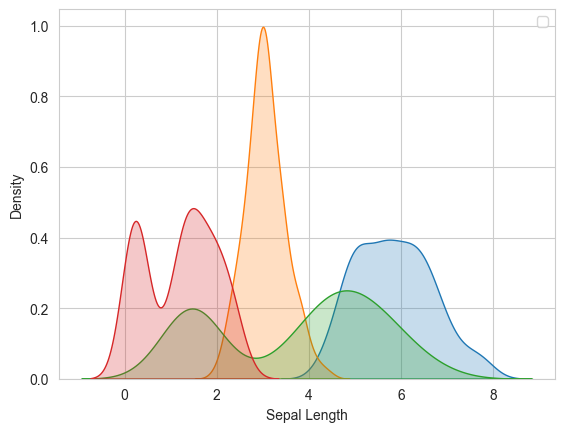

In [67]:
import seaborn as sns

# Gráficos de densidad
sns.set_style('whitegrid')
sns.kdeplot(dataset['Sepal Length'], shade=True)
sns.kdeplot(dataset['Sepal Width'], shade=True)
sns.kdeplot(dataset['Petal Length'], shade=True)
sns.kdeplot(dataset['Petal Width'], shade=True)
plt.legend(loc='upper right')
plt.show()

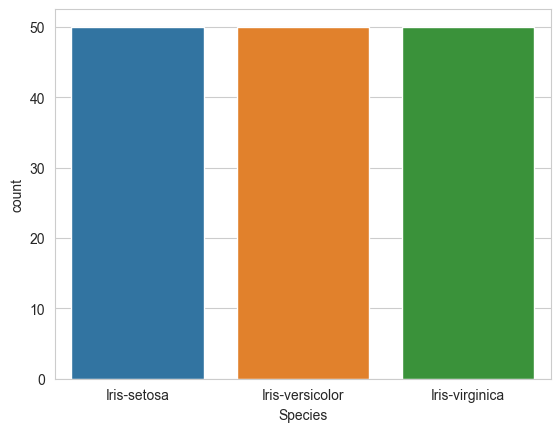

In [68]:
# Gráficos de barras
sns.countplot(x='Species', data=dataset)
plt.show()


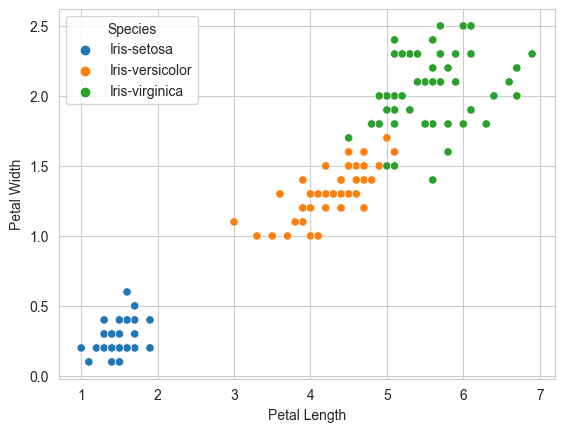

In [69]:
# Gráficos de dispersión
sns.scatterplot(x='Petal Length', y='Petal Width', hue='Species', data=dataset)
plt.show()

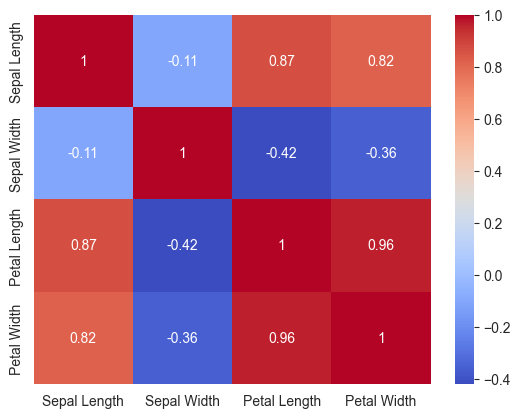

In [70]:
# Mapas de calor
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

## 6. Evaluate Some Algorithms

- We need to know that the model we created is good.
- Use statistical methods to estimate the accuray of the models on unseen data: split the dataset in two, 80% to train, evaluate and select among our models and 20% hold back as a validation dataset

### 6.1. Create a validation dataset

In [72]:
from sklearn.preprocessing import StandardScaler

# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply feature scaling to the data
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_validation = scaler.transform(X_validation)


### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [77]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	from sklearn.model_selection import GridSearchCV

	# Grid search for KNN
	param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
	knn = KNeighborsClassifier()
	knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=kfold)
	knn_grid_result = knn_grid.fit(rescaledX_train, Y_train)

	# Grid search for SVM
	param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
	svm = SVC(gamma='auto')
	svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=kfold)
	svm_grid_result = svm_grid.fit(rescaledX_train, Y_train)
	
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: \n\tMean Accuracy: %f \n\tSTD Derivation:%f' % (name, cv_results.mean(), cv_results.std()))

LR: 
	Mean Accuracy: 0.941667 
	STD Derivation:0.065085
LDA: 
	Mean Accuracy: 0.975000 
	STD Derivation:0.038188
KNN: 
	Mean Accuracy: 0.958333 
	STD Derivation:0.041667
CART: 
	Mean Accuracy: 0.958333 
	STD Derivation:0.041667
NB: 
	Mean Accuracy: 0.950000 
	STD Derivation:0.055277
SVM: 
	Mean Accuracy: 0.983333 
	STD Derivation:0.033333


- Support Vector Machines (SVM) has the largest estimated accuracy score: ~ 98%
- Linear Discriminant Analysis (LDA) has the second one: ~ 97%

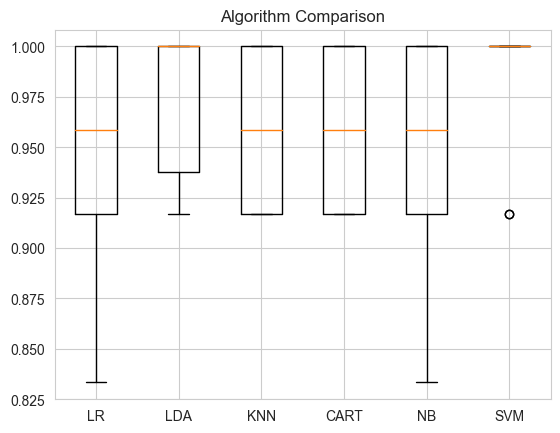

In [78]:
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

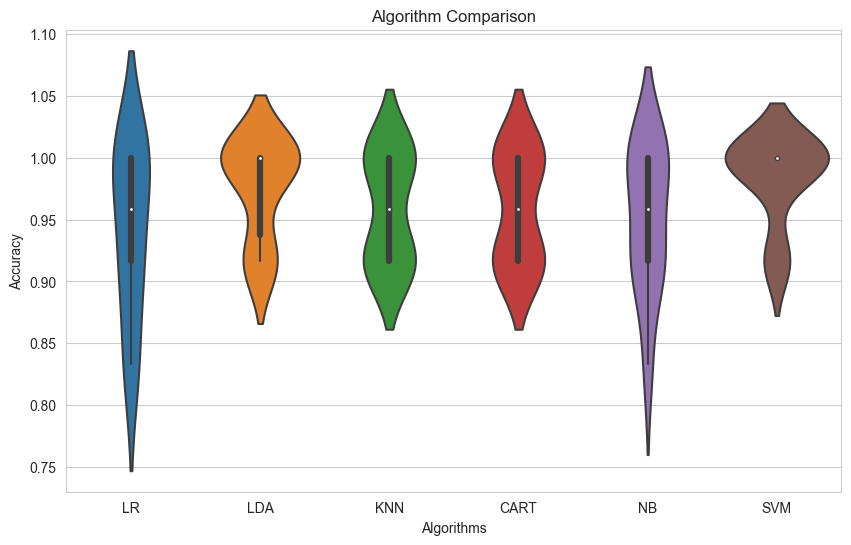

In [89]:
results_df = pd.DataFrame(data=results).T
results_df.columns = names

plt.figure(figsize=(10,6))
sns.violinplot(data=results_df)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

## 7. Making predictions and evaluate them

In [91]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [101]:
# Evaluate predictions by comparing them to the expected results in the validation set
print("accuracy: ", accuracy_score(Y_validation, predictions))

accuracy:  0.9666666666666667


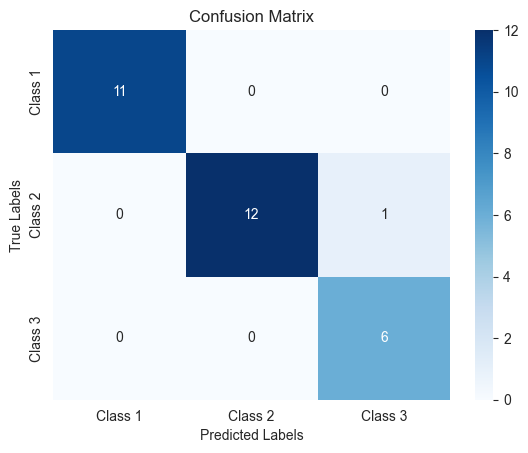

In [102]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Define the class labels
class_labels = ['Class 1', 'Class 2', 'Class 3']

# Create the confusion matrix
conf_mat = confusion_matrix(Y_validation, predictions)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [106]:
# Get classification report
report = classification_report(Y_validation, predictions, target_names=['class 1', 'class 2', 'class 3'], output_dict=True)

# Convert dictionary to dataframe
df_report = pd.DataFrame(report).transpose()

# Format columns
df_report.columns = ['precision', 'recall', 'f1-score', 'support']
df_report = df_report[['precision', 'recall', 'f1-score', 'support']]

# Add Avg/Total row
df_report.loc['Avg/Total',:] = df_report.mean()

# Print report
print(df_report)


              precision    recall  f1-score    support
class 1        1.000000  1.000000  1.000000  11.000000
class 2        1.000000  0.923077  0.960000  13.000000
class 3        0.857143  1.000000  0.923077   6.000000
accuracy       0.966667  0.966667  0.966667   0.966667
macro avg      0.952381  0.974359  0.961026  30.000000
weighted avg   0.971429  0.966667  0.967282  30.000000
Avg/Total      0.957937  0.971795  0.963009  15.161111


In [122]:
from tabulate import tabulate

def format_confusion_matrix(conf_mat):
    formatted_matrix = []
    for row in conf_mat:
        formatted_matrix.append(' | '.join(map(str, row)))
    return '\n'.join(formatted_matrix)

# Evaluate each model in turn and store the results in a list of dictionaries
model_results = []
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, predictions)
    conf_mat = confusion_matrix(Y_validation, predictions)
    class_report = classification_report(Y_validation, predictions)
    
    model_results.append({
        'Model': name,
        'Accuracy': f"{accuracy}",
        'Confusion Matrix': format_confusion_matrix(conf_mat),
        'Classification Report': class_report
    })

# Print the results in a tabular style using the tabulate library
headers = ['Model', 'Accuracy', 'Confusion Matrix', 'Classification Report']
rows = []
for d in model_results:
    row = [d['Model'], d['Accuracy'], d['Confusion Matrix'], d['Classification Report']]
    rows.append(row)

print(tabulate(rows, headers=headers, tablefmt="grid"))


+---------+------------+--------------------+----------------------------------------------------------+
| Model   |   Accuracy | Confusion Matrix   | Classification Report                                    |
+=========+============+====================+==========================================================+
| LR      |   0.833333 | 11 | 0 | 0         | precision    recall  f1-score   support                  |
|         |            | 0 | 8 | 5          |                                                          |
|         |            | 0 | 0 | 6          |     Iris-setosa       1.00      1.00      1.00        11 |
|         |            |                    | Iris-versicolor       1.00      0.62      0.76        13 |
|         |            |                    |  Iris-virginica       0.55      1.00      0.71         6 |
|         |            |                    |                                                          |
|         |            |                    |        ac